In [10]:
!pip install -q tabula-py
!pip install plotly

In [12]:
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68734 sha256=8743c8de4b823c5515c9f249b1e87bf354482fac8394fc858d43c20aaf835da8
  Stored in directory: c:\users\santiago gordillo\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [1]:
import cufflinks as cf
from plotly.offline import iplot,download_plotlyjs, init_notebook_mode, plot

In [2]:
cf.go_offline()

In [3]:
init_notebook_mode(connected= True) 

In [4]:
%matplotlib inline 
#para poder visualizar los datos dentro del notebook de jupiter

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tabula
import plotly.express as px
import plotly.graph_objects as go
#widgets para dashboards dinamicos
from ipywidgets import widgets

In [6]:
#leyendo el PDF 
df =tabula.read_pdf("https://www.mintic.gov.co/micrositios/unticketparaelfuturo/799/articles-196730_oferta_educativa_universidades_colombia.pdf",pages="all",pandas_options={'header': None}) #asiganamos pandasOptions
becas= pd.concat([ df[x] for x in range(len(df)) ], ignore_index=True) #unimos las 9 paginas del pdf en un solo dataframe
becas.columns = becas.iloc[0] #reasignamos el encabezado
becas.drop(0, axis=0, inplace= True) #eliminamos fila 0
becas

,NOMBRE INSTITUCIÓN,NOMBRE DEL PROGRAMA,MODALIDAD,CIUDAD
1,UNIVERSIDAD NACIONAL DE COLOMBIA,MAESTRÍA EN BIOINFORMÁTICA,Presencial,Bogotá
2,UNIVERSIDAD NACIONAL DE COLOMBIA,MAESTRÍA EN CIENCIA Y TECNOLOGÍA DE ALIMENTOS,Presencial,Bogotá
3,UNIVERSIDAD NACIONAL DE COLOMBIA,MAESTRÍA EN CIENCIAS - BIOTECNOLOGÍA,Presencial,Bogotá
4,UNIVERSIDAD NACIONAL DE COLOMBIA,MAESTRÍA EN COMUNICACIÓN Y MEDIOS,Presencial,Bogotá
5,UNIVERSIDAD NACIONAL DE COLOMBIA,MAESTRÍA EN INGENIERÍA - TELECOMUNICACIONES,Presencial,Bogotá
...,...,...,...,...
310,UNIVERSIDAD PONTIFICIA BOLIVARIANA,MAESTRÍA EN INGENIERÍA E INNOVACIÓN PARA EL DE...,Presencial,Bucaramanga
311,UNIVERSIDAD PONTIFICIA BOLIVARIANA,MAESTRÍA EN INGENIERÍA ELECTRÓNICA,Presencial,Bucaramanga
312,UNIVERSIDAD PONTIFICIA BOLIVARIANA,MAESTRÍA EN INNOVACIÓN SOCIAL Y TERRITORIO,Virtual,Bucaramanga
313,UNIVERSIDAD PONTIFICIA BOLIVARIANA,ESPECIALIZACIÓN EN GERENCIA DE SISTEMAS Y TECN...,Presencial,Montería


## Graficamos

######## filtraremos por universidad ######## 
 Escriba de que universidad desea ver la becas:['UNIVERSIDAD NACIONAL DE COLOMBIA' 'UNIVERSIDAD PEDAGÓGICA NACIONAL'
 'UNIVERSIDAD PEDAGÓGICA Y TECNOLÓGICA DE COLOMBIA - UPTC'
 'UNIVERSIDAD DEL CAUCA' 'UNIVERSIDAD TECNOLÓGICA DE PEREIRA - UTP'
 'UNIVERSIDAD DE CALDAS' 'UNIVERSIDAD DE CÓRDOBA'
 'UNIVERSIDAD SURCOLOMBIANA' 'UNIVERSIDAD DE ANTIOQUIA'
 'UNIVERSIDAD DEL VALLE' 'UNIVERSIDAD INDUSTRIAL DE SANTANDER'
 'UNIVERSIDAD DE CARTAGENA' 'UNIVERSIDAD DE NARIÑO'
 'UNIVERSIDAD DEL TOLIMA' 'UNIVERSIDAD DE PAMPLONA'
 'UNIVERSIDAD DISTRITAL-FRANCISCO JOSÉ DE CALDAS'
 'PONTIFICIA UNIVERSIDAD JAVERIANA' 'UNIVERSIDAD SANTO TOMÁS'
 'UNIVERSIDAD EXTERNADO DE COLOMBIA'
 'FUNDACIÓN UNIVERSIDAD DE BOGOTÁ - JORGE TADEO LOZANO'
 'UNIVERSIDAD CENTRAL' 'UNIVERSIDAD PONTIFICIA BOLIVARIANA'
 'UNIVERSIDAD DE LA SABANA' 'UNIVERSIDAD EAFIT' 'UNIVERSIDAD DEL NORTE'
 'COLEGIO MAYOR DE NUESTRA SEÑORA DEL ROSARIO'
 'UNIVERSIDAD DE SAN BUENAVENTURA' 'UNIVERSIDAD CATO

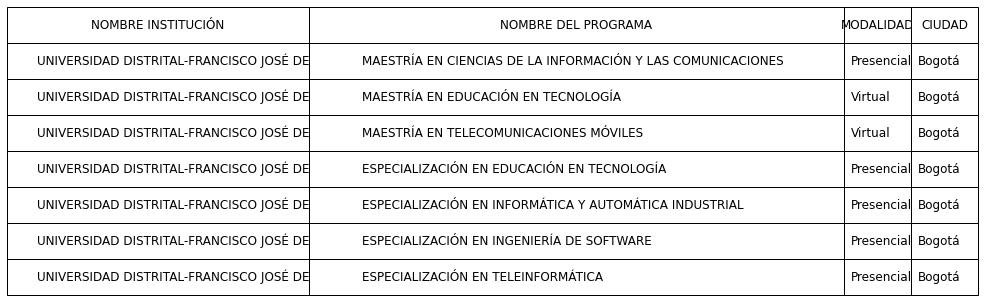

In [39]:
############### a continuacion filtraremos por universidad ###################
#lista de universidades
listaUniversidades = becas['NOMBRE INSTITUCIÓN'].unique()

universidad= input(f'######## filtraremos por universidad ######## \n Escriba de que universidad desea ver la becas:{listaUniversidades} : --> ')
filtroXUniversidad = becas [ becas['NOMBRE INSTITUCIÓN'].str.contains(universidad,case=False) ] #nuevo Dataframe

# graficamos la tabla
fig, ax =plt.subplots(1,1)
ax.axis('tight')
ax.axis('off')
tabla= ax.table(cellText=filtroXUniversidad.values,
          colLabels=filtroXUniversidad.columns,
          colWidths=[0.9,1.6,0.2,0.2],
          loc="center",
          cellLoc="left"
          )
tabla.auto_set_font_size(False)
tabla.scale(1, 3)
tabla.set_fontsize(12)

plt.show()

### CIUDAD POR MAYOR NUMERO DE BECAS OFERTADAS

In [8]:
becasXCiudad= becas.groupby("CIUDAD", as_index=False).count().sort_values("NOMBRE INSTITUCIÓN", ascending=False)

becasXCiudad.iplot(kind="bar", title = "becasXCiudad", x ="CIUDAD", y="NOMBRE INSTITUCIÓN", labels={'CIUDAD':'CITY'})


### UNIVERSIDADES QUE MAS OFERTAN BECAS

In [9]:
#otra forma de usar plotly -- con "import plotly.express as px"
#UNIVERSIDADES QUE MAS OFRENCEN BECAS
becasXUniversidad= becas.groupby("NOMBRE INSTITUCIÓN", as_index=False).count().sort_values("CIUDAD", ascending=False)
becasXUniversidad
fig = px.bar(becasXUniversidad,x ="NOMBRE INSTITUCIÓN", y="CIUDAD", labels={'CIUDAD':'# BECAS', "NOMBRE INSTITUCIÓN": "UNIV" },title="becasXuniversidad ")
fig.show()

### BECAS X UNIVERSIDAD con filtros dinamicos


In [40]:
#creamos el filtro desplegable
universidad = widgets.Dropdown(
    description='Universidad:   ',
    value='UNIVERSIDAD NACIONAL DE COLOMBIA',
    options=becas['NOMBRE INSTITUCIÓN'].unique().tolist()
)
#creamos el grafico, tipo tabla
grafico1 = go.Table(cells=dict(values= [becas['NOMBRE DEL PROGRAMA']] ) , #tener cuidado con la forma de poner el "values"
            header=dict(                                                            ## [[col1], [col2]..]
            values=["Nombre del Programa"],
            font=dict(size=10),
            align="left"
           ) )

g = go.FigureWidget(data=[grafico1],
                    layout=go.Layout(
                        title=dict(
                            text='BECAS X UNIVERSIDAD'
                        ),
                        barmode='overlay'
                    ))

#funcion para manejar el input de los widgets, 
def validate():
    if universidad.value in becas['NOMBRE INSTITUCIÓN'].unique() :
        return True
    else:
        return False
    
def response(change):
        if validate():
        
            filter_list = (becas['NOMBRE INSTITUCIÓN'] == universidad.value) 
            temp_df = becas[filter_list]

        
        x1 = temp_df['NOMBRE DEL PROGRAMA']
        
        
        with g.batch_update():
            g.data[0].cells.values = [x1]
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = 'NOMBRE DEL PROGRAMA'
            g.layout.yaxis.title = 'y'    

#esto es tipo onchange de Javasript
universidad.observe(response, names="value")

#Time to try the app out!!
container = widgets.HBox([universidad])
widgets.VBox([container, g])